In [30]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
def getChainIds(lines):
  chainIds = []
  for l in lines:
    if l[21] not in chainIds:
      chainIds.append(l[21])

  return chainIds

def getProteinChain(chainId, lines):
  atoms = {}
  for l in lines:
    if l[21] == chainId and l[13:15] == 'CA':
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = (x, y, z)
  return atoms

def getRNAChain(chainId, lines):
  atoms = {}
  nucleotides = ['A', 'U', 'C', 'G']
  for l in lines:
    if l[21] == chainId and l[18:20].strip() in nucleotides:
      resSeq = int(l[22:26])
      x = float(l[30:38])
      y = float(l[39:46])
      z = float(l[47:54])
      atoms[resSeq] = (x, y, z)
  return atoms

In [45]:
import os

DATABASE_DIR = '/content/drive/MyDrive/structures'

def readFiles():
  proteinChains = {}
  RNAChains = {}
  for filename in os.listdir(DATABASE_DIR):
    with open(f'{DATABASE_DIR}/{filename}', 'r') as fr:
      lines = fr.readlines()
      structCode = filename[:4]
      chainIDs = getChainIds(lines)
      if len(chainIDs) == 2:
        for chainID in chainIDs:
          proteinChain = getProteinChain(chainID, lines)
          if proteinChain != {}:
            proteinChains[structCode] = proteinChain
          RNAChain = getRNAChain(chainID, lines)
          if RNAChain != {}:
            RNAChains[structCode] = RNAChain

  return proteinChains, RNAChains

proteinChains, RNAChains = readFiles()

In [33]:
import pandas as pd

plot_rna_data = []

for key, values in RNAChains.items():
  plot_rna_data.append([key, len(values)])


rna_df = pd.DataFrame(plot_rna_data, columns=['Structure', 'Number of nucleotides'])
print(rna_df)

    Structure  Number of nucleotides
0        1a4t                     15
1        1biv                     28
2        1aud                     30
3        1exy                     33
4        1emi                    161
..        ...                    ...
193      8fti                     97
194      8e28                     15
195      8e2a                     15
196      8as6                     14
197      8acc                      5

[198 rows x 2 columns]


In [34]:
plot_protein_data = []

for key, values in proteinChains.items():
  plot_protein_data.append([key, len(values)])

protein_df = pd.DataFrame(plot_protein_data, columns=['Structure', 'Number of amino acids'])
print(protein_df)

    Structure  Number of amino acids
0        1a4t                     19
1        1biv                     17
2        1aud                    101
3        1exy                     16
4        1emi                    136
..        ...                    ...
193      8fti                    737
194      8e28                    690
195      8e2a                    686
196      8as6                   1566
197      8acc                    231

[198 rows x 2 columns]


In [35]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,Number of nucleotides
0,1a4t,19,15
1,1biv,17,28
2,1aud,101,30
3,1exy,16,33
4,1emi,136,161
...,...,...,...
193,8fti,737,97
194,8e28,690,15
195,8e2a,686,15
196,8as6,1566,14


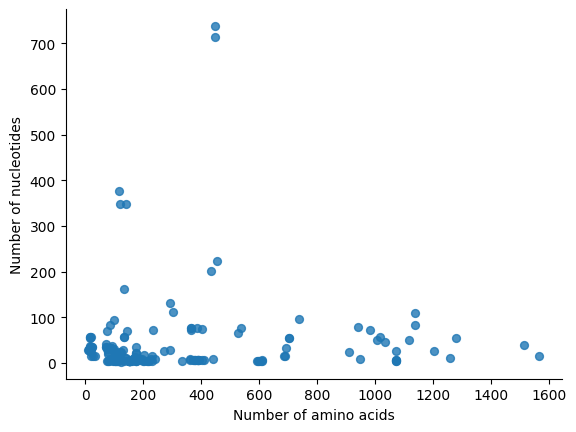

In [36]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

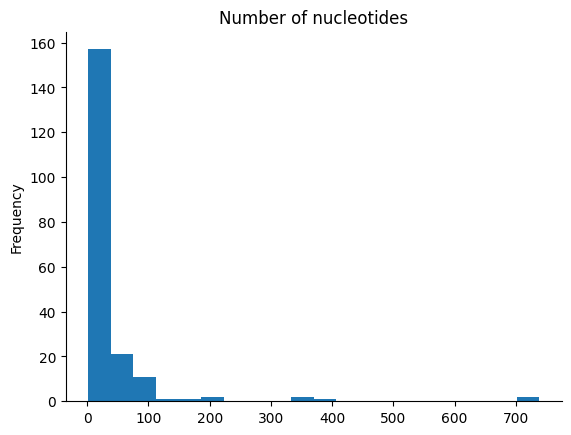

In [37]:
from matplotlib import pyplot as plt
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

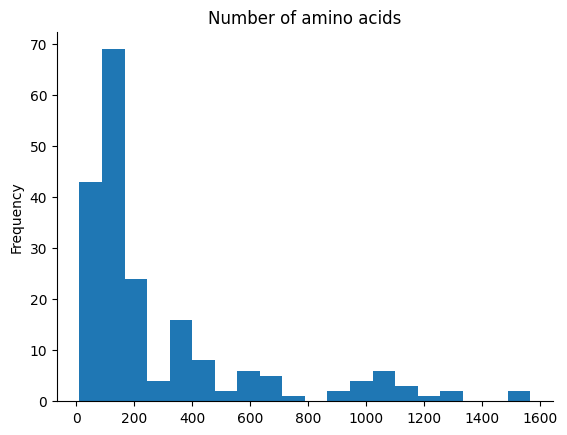

In [38]:
from matplotlib import pyplot as plt
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
import pandas as pd

plot_rna_data = []

for key, values in RNAChains.items():
  if len(values) < 150:
    plot_rna_data.append([key, len(values)])


rna_df = pd.DataFrame(plot_rna_data, columns=['Structure', 'Number of nucleotides'])
print(rna_df)

    Structure  Number of nucleotides
0        1a4t                     15
1        1biv                     28
2        1aud                     30
3        1exy                     33
4        1etf                     34
..        ...                    ...
185      8fti                     97
186      8e28                     15
187      8e2a                     15
188      8as6                     14
189      8acc                      5

[190 rows x 2 columns]


In [40]:
plot_protein_data = []

for key, values in proteinChains.items():
  if len(values) < 800:
    plot_protein_data.append([key, len(values)])

protein_df = pd.DataFrame(plot_protein_data, columns=['Structure', 'Number of amino acids'])
print(protein_df)

    Structure  Number of amino acids
0        1a4t                     19
1        1biv                     17
2        1aud                    101
3        1exy                     16
4        1emi                    136
..        ...                    ...
173      7zpi                    705
174      8fti                    737
175      8e28                    690
176      8e2a                    686
177      8acc                    231

[178 rows x 2 columns]


In [41]:
df = pd.merge(protein_df, rna_df, on = "Structure")

df

,Structure,Number of amino acids,Number of nucleotides
0,1a4t,19,15
1,1biv,17,28
2,1aud,101,30
3,1exy,16,33
4,1etf,23,34
...,...,...,...
165,7zpi,705,55
166,8fti,737,97
167,8e28,690,15
168,8e2a,686,15


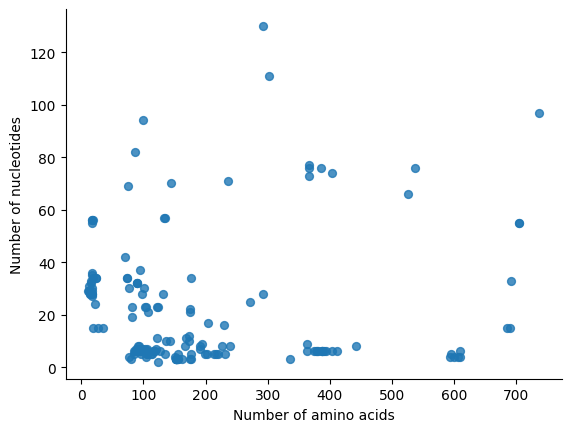

In [42]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Number of amino acids', y='Number of nucleotides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

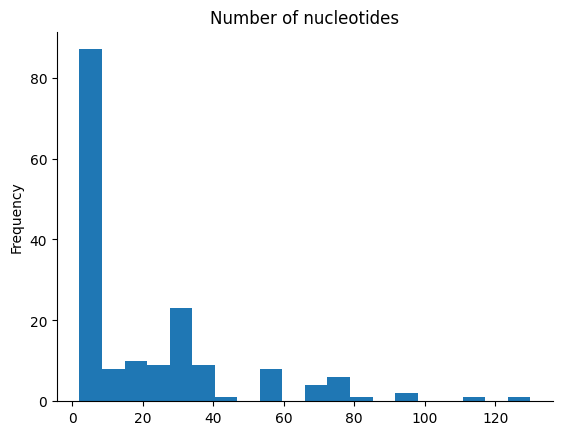

In [43]:
from matplotlib import pyplot as plt
df['Number of nucleotides'].plot(kind='hist', bins=20, title='Number of nucleotides')
plt.gca().spines[['top', 'right',]].set_visible(False)

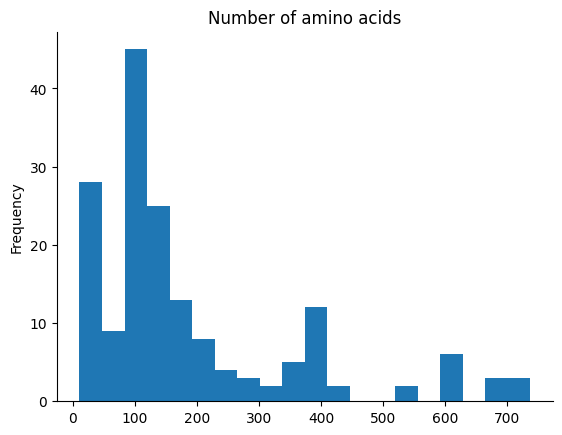

In [44]:
from matplotlib import pyplot as plt
df['Number of amino acids'].plot(kind='hist', bins=20, title='Number of amino acids')
plt.gca().spines[['top', 'right',]].set_visible(False)